In [8]:
import numpy as np
import sns_init

_zhfont = sns_init.zhfont

kw = 1e-14  # 25°下水的离子积
ka = np.array([1.3e-3, 2.9e-6])

n = ka.shape[0]


def p(a):
    return -np.log10(a)


def pc(a):
    return 10 ** -a


def _delta_p(c_h, k):
    ans = np.ones_like(c_h)
    for i in range(0, k):
        ans *= ka[i]
    ans *= c_h ** (n - k)
    return ans


def delta(ph, k):
    c_h = pc(ph)
    s = np.array([_delta_p(c_h, i) for i in range(0, n + 1)])
    return s[k] / s.sum(axis=0)

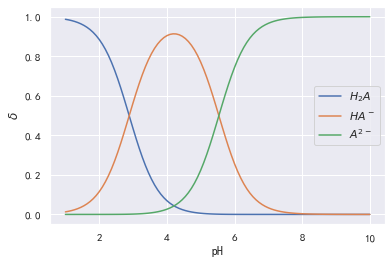

In [13]:
from matplotlib import pyplot as plt

plt.figure()
x_ph = np.linspace(1, 10, 100)
y = np.array([delta(x_ph, i) for i in range(0, n + 1)])
plt.plot(x_ph, y[0], label=r'$H_2A$')
plt.plot(x_ph, y[1], label=r'$HA^-$')
plt.plot(x_ph, y[2], label=r'$A^{2-}$')
plt.xlabel(r'pH')
plt.ylabel(r'$\delta$')
plt.legend()

C:\Users\ENZYME~1\AppData\Local\Temp/ipykernel_12648/2981637049.py:13: RuntimeWarning: divide by zero encountered in log10
  return -np.log10(a)


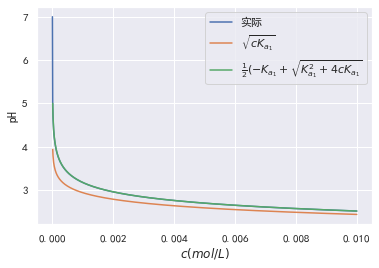

In [17]:
from scipy.optimize import root_scalar


def solve_act_h(c, k=0):
    def f(x):
        ans = x
        ans -= kw / x
        for i in range(0, n + 1):
            ans += c * delta(p(x), i) * (k - i)
        return ans

    root_result = root_scalar(f, bracket=(1e-14, 10))
    if not root_result.converged:
        raise ValueError("c () cannot converge.".format(c))
    return root_result.root


def approximate_1(c):
    return np.sqrt(c * ka[0])  # 最粗略的估计


def approximate_2(c):
    return 1 / 2 * (-ka[0] + np.sqrt(ka[0] ** 2 + 4 * c * ka[0]))


x_c = np.linspace(0, 0.01, 1000)
y_h = p(np.array([solve_act_h(i) for i in x_c]))
a_1 = p(approximate_1(x_c))
a_2 = p(approximate_2(x_c))
plt.plot(x_c, y_h, label='实际')
plt.plot(x_c, a_1, label=r'$\sqrt{cK_{a_1}}$')
plt.plot(x_c, a_2, label=r'$\frac{1}{2}(-K_{a_1} + \sqrt{K_{a_1}^2+4cK_{a_1}}$')
plt.xlabel(r'$c(mol/L)$')
plt.ylabel(r'pH')
plt.legend()


C:\Users\ENZYME~1\AppData\Local\Temp/ipykernel_12648/2981637049.py:13: RuntimeWarning: divide by zero encountered in log10
  return -np.log10(a)


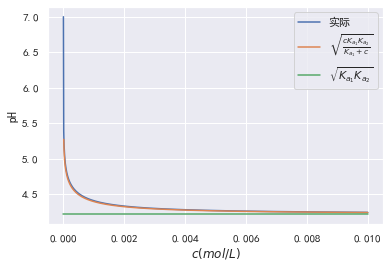

In [26]:
plt.figure()
y_h = p(np.array([solve_act_h(i, 1) for i in x_c]))

def approximate_1(c):
    return np.sqrt(c * ka[0] * ka[1] / (ka[0] + c))

def approximate_2(c):
    return np.sqrt(ka[0] * ka[1] * np.ones_like(c))

plt.plot(x_c, y_h, label='实际')
plt.plot(x_c, p(approximate_1(x_c)), label=r'$\sqrt{\frac{cK_{a_1}K_{a_2}}{K_{a_1}+c}}$')
plt.plot(x_c, p(approximate_2(x_c)), label=r'$\sqrt{K_{a_1}K_{a_2}}$')
plt.xlabel(r'$c(mol/L)$')
plt.ylabel(r'pH')
plt.legend()